### Importing important libraries and dependencies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix

### Importing data

In [2]:
data = pd.read_csv("Churn_data.csv")
col = pd.read_csv("Column Names.csv")

### Columns renaming

In [3]:
new_col = col.iloc[0,0]

In [4]:
data.rename(columns={data.columns[0]:new_col}, inplace=True)

In [5]:
data

,s6.new.rev.p2.m2,s1.new.rev.m1,s3.og.rev.4db.p5,s3.new.rev.4db.p5,s4.usg.ins.p2,s4.og.unq.any.p2,s2.rch.val.p6,s1.og.rev.all.m1,s8.new.rev.p6,s4.loc.ic.ins.p1,...,prop.og.mou.tot.mou.all.p6,prop.i2i.og.mou.p6,s4.loc.ic.ins.p2,s4.std.ic.ins.l14,s4.low.blnc.ins.p4,s3.og.rev.all.m2,s3.new.rev.m2,prop.og.mou.any.p6,prop.loc.i2i.mou.og.mou.p3,s3.rev.p1
0,-0.76,88.0482,3.106604,3.754955,4,14,39.29,57.320,-0.17,1,...,0.454642,0.497397,4,0,9,6.02,8.20,46.465636,0.609456,0.22
1,-0.98,67.5039,3.094574,5.550865,1,2,21.67,38.700,-0.32,3,...,0.343190,0.767617,6,0,20,3.66,8.10,34.525456,1.000000,0.38
2,-0.98,33.9248,2.324016,2.438114,2,3,30.00,15.320,-0.05,3,...,0.101838,0.619034,6,1,19,4.33,4.36,10.298451,0.699592,0.11
3,-0.92,82.6780,2.630749,2.858961,2,3,50.00,51.956,-0.18,4,...,0.066602,0.437088,7,2,11,3.40,3.53,6.670783,0.086617,5.18
4,-0.97,96.8379,2.674316,2.912397,3,2,22.50,66.886,0.01,4,...,0.219821,0.585977,6,1,14,3.85,3.87,21.998905,0.683105,0.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,0.21,132.0365,2.652236,2.857739,5,8,26.67,123.396,-0.16,4,...,0.145831,0.200151,7,0,18,3.57,3.83,14.896154,0.328027,0.76
24996,0.80,77.0154,3.763389,5.012503,2,8,27.88,62.140,0.19,4,...,0.529829,0.169835,7,0,18,6.89,7.70,55.156230,0.288006,12.74
24997,0.01,148.8337,3.823940,4.334250,6,10,10.00,98.900,-0.03,2,...,0.327245,0.407944,3,0,12,6.63,7.48,33.222018,0.235918,8.07
24998,0.17,1012.4398,14.667580,14.579567,7,67,42.92,734.005,0.70,4,...,0.824671,0.889239,7,1,1,19.36,22.26,82.549378,0.952962,21.21


In [6]:
target_column = data.iloc[:, 17]
data.drop(columns=data.columns[17], inplace=True)
data['target'] = target_column

In [7]:
data

,s6.new.rev.p2.m2,s1.new.rev.m1,s3.og.rev.4db.p5,s3.new.rev.4db.p5,s4.usg.ins.p2,s4.og.unq.any.p2,s2.rch.val.p6,s1.og.rev.all.m1,s8.new.rev.p6,s4.loc.ic.ins.p1,...,prop.i2i.og.mou.p6,s4.loc.ic.ins.p2,s4.std.ic.ins.l14,s4.low.blnc.ins.p4,s3.og.rev.all.m2,s3.new.rev.m2,prop.og.mou.any.p6,prop.loc.i2i.mou.og.mou.p3,s3.rev.p1,target
0,-0.76,88.0482,3.106604,3.754955,4,14,39.29,57.320,-0.17,1,...,0.497397,4,0,9,6.02,8.20,46.465636,0.609456,0.22,1
1,-0.98,67.5039,3.094574,5.550865,1,2,21.67,38.700,-0.32,3,...,0.767617,6,0,20,3.66,8.10,34.525456,1.000000,0.38,1
2,-0.98,33.9248,2.324016,2.438114,2,3,30.00,15.320,-0.05,3,...,0.619034,6,1,19,4.33,4.36,10.298451,0.699592,0.11,1
3,-0.92,82.6780,2.630749,2.858961,2,3,50.00,51.956,-0.18,4,...,0.437088,7,2,11,3.40,3.53,6.670783,0.086617,5.18,0
4,-0.97,96.8379,2.674316,2.912397,3,2,22.50,66.886,0.01,4,...,0.585977,6,1,14,3.85,3.87,21.998905,0.683105,0.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,0.21,132.0365,2.652236,2.857739,5,8,26.67,123.396,-0.16,4,...,0.200151,7,0,18,3.57,3.83,14.896154,0.328027,0.76,1
24996,0.80,77.0154,3.763389,5.012503,2,8,27.88,62.140,0.19,4,...,0.169835,7,0,18,6.89,7.70,55.156230,0.288006,12.74,0
24997,0.01,148.8337,3.823940,4.334250,6,10,10.00,98.900,-0.03,2,...,0.407944,3,0,12,6.63,7.48,33.222018,0.235918,8.07,0
24998,0.17,1012.4398,14.667580,14.579567,7,67,42.92,734.005,0.70,4,...,0.889239,7,1,1,19.36,22.26,82.549378,0.952962,21.21,0


In [8]:
print("First 5 rows of the dataset:")
data.head()

First 5 rows of the dataset:


,s6.new.rev.p2.m2,s1.new.rev.m1,s3.og.rev.4db.p5,s3.new.rev.4db.p5,s4.usg.ins.p2,s4.og.unq.any.p2,s2.rch.val.p6,s1.og.rev.all.m1,s8.new.rev.p6,s4.loc.ic.ins.p1,...,prop.i2i.og.mou.p6,s4.loc.ic.ins.p2,s4.std.ic.ins.l14,s4.low.blnc.ins.p4,s3.og.rev.all.m2,s3.new.rev.m2,prop.og.mou.any.p6,prop.loc.i2i.mou.og.mou.p3,s3.rev.p1,target
0,-0.76,88.0482,3.106604,3.754955,4,14,39.29,57.320,-0.17,1,...,0.497397,4,0,9,6.02,8.20,46.465636,0.609456,0.22,1
1,-0.98,67.5039,3.094574,5.550865,1,2,21.67,38.700,-0.32,3,...,0.767617,6,0,20,3.66,8.10,34.525456,1.000000,0.38,1
2,-0.98,33.9248,2.324016,2.438114,2,3,30.00,15.320,-0.05,3,...,0.619034,6,1,19,4.33,4.36,10.298451,0.699592,0.11,1
3,-0.92,82.6780,2.630749,2.858961,2,3,50.00,51.956,-0.18,4,...,0.437088,7,2,11,3.40,3.53,6.670783,0.086617,5.18,0
4,-0.97,96.8379,2.674316,2.912397,3,2,22.50,66.886,0.01,4,...,0.585977,6,1,14,3.85,3.87,21.998905,0.683105,0.10,0


In [9]:
print("Last 5 rows of the dataset:")
data.tail()

Last 5 rows of the dataset:


,s6.new.rev.p2.m2,s1.new.rev.m1,s3.og.rev.4db.p5,s3.new.rev.4db.p5,s4.usg.ins.p2,s4.og.unq.any.p2,s2.rch.val.p6,s1.og.rev.all.m1,s8.new.rev.p6,s4.loc.ic.ins.p1,...,prop.i2i.og.mou.p6,s4.loc.ic.ins.p2,s4.std.ic.ins.l14,s4.low.blnc.ins.p4,s3.og.rev.all.m2,s3.new.rev.m2,prop.og.mou.any.p6,prop.loc.i2i.mou.og.mou.p3,s3.rev.p1,target
24995,0.21,132.0365,2.652236,2.857739,5,8,26.67,123.396,-0.16,4,...,0.200151,7,0,18,3.57,3.83,14.896154,0.328027,0.76,1
24996,0.80,77.0154,3.763389,5.012503,2,8,27.88,62.140,0.19,4,...,0.169835,7,0,18,6.89,7.70,55.156230,0.288006,12.74,0
24997,0.01,148.8337,3.823940,4.334250,6,10,10.00,98.900,-0.03,2,...,0.407944,3,0,12,6.63,7.48,33.222018,0.235918,8.07,0
24998,0.17,1012.4398,14.667580,14.579567,7,67,42.92,734.005,0.70,4,...,0.889239,7,1,1,19.36,22.26,82.549378,0.952962,21.21,0
24999,-1.00,275.3530,5.134579,5.954062,1,1,53.50,250.340,-0.48,4,...,0.609046,7,0,18,5.42,8.02,38.590040,1.000000,0.00,1


In [10]:
print(f'Dataset have {data.shape[0]} rows and {data.shape[1]} columns')

Dataset have 25000 rows and 111 columns


In [11]:
print("Information about the dataset:")
data.info()

Information about the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Columns: 111 entries, s6.new.rev.p2.m2 to target
dtypes: float64(80), int64(31)
memory usage: 21.2 MB


In [12]:
data.columns

Index(['s6.new.rev.p2.m2', 's1.new.rev.m1', 's3.og.rev.4db.p5',
       's3.new.rev.4db.p5', 's4.usg.ins.p2', 's4.og.unq.any.p2',
       's2.rch.val.p6', 's1.og.rev.all.m1', 's8.new.rev.p6',
       's4.loc.ic.ins.p1',
       ...
       'prop.i2i.og.mou.p6', 's4.loc.ic.ins.p2', 's4.std.ic.ins.l14',
       's4.low.blnc.ins.p4', 's3.og.rev.all.m2', 's3.new.rev.m2',
       'prop.og.mou.any.p6', 'prop.loc.i2i.mou.og.mou.p3', 's3.rev.p1',
       'target'],
      dtype='object', length=111)

In [13]:
data.dtypes

s6.new.rev.p2.m2              float64
s1.new.rev.m1                 float64
s3.og.rev.4db.p5              float64
s3.new.rev.4db.p5             float64
s4.usg.ins.p2                   int64
                               ...   
s3.new.rev.m2                 float64
prop.og.mou.any.p6            float64
prop.loc.i2i.mou.og.mou.p3    float64
s3.rev.p1                     float64
target                          int64
Length: 111, dtype: object

In [14]:
data['target'].value_counts()

target
0    17083
1     7917
Name: count, dtype: int64

In [15]:
print("Summary statistics for numeric columns")
data.describe().T

Summary statistics for numeric columns


,count,mean,std,min,25%,50%,75%,max
s6.new.rev.p2.m2,25000.0,-0.003730,2.727916,-1.000000,-0.580000,-0.170000,0.280000,316.860000
s1.new.rev.m1,25000.0,281.073083,276.075983,0.000000,101.563800,204.859600,370.711650,5702.924300
s3.og.rev.4db.p5,25000.0,4.890003,4.212452,0.000000,2.367288,3.729944,5.993342,153.221695
s3.new.rev.4db.p5,25000.0,7.070194,6.318992,0.000833,3.318825,5.231268,8.395736,170.200441
s4.usg.ins.p2,25000.0,5.460080,2.184444,0.000000,5.000000,7.000000,7.000000,7.000000
...,...,...,...,...,...,...,...,...
s3.new.rev.m2,25000.0,12.540182,11.540611,0.000000,6.167500,9.350000,14.620000,386.480000
prop.og.mou.any.p6,25000.0,53.594165,21.408486,0.000000,39.378142,53.976203,68.312416,100.000000
prop.loc.i2i.mou.og.mou.p3,25000.0,0.483975,0.292349,0.000000,0.251304,0.477621,0.716538,1.000000
s3.rev.p1,25000.0,9.951366,17.648128,0.000000,1.970000,5.380000,11.400000,585.500000


### Checking null values

In [16]:
for i in range(len(data.columns)):
    if data.iloc[:,i].isna().sum()!=0:
        print(i)
    else:
        print('None')

None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None


### Duplicate values

In [17]:
duplicates = data[data.duplicated()]
if duplicates.empty:
    print("No duplicates found.")
else:
    print("Duplicates found:")
    print(duplicates)

No duplicates found.


### Removing Unique value variables

In [18]:
value_counts = data.nunique()
print(value_counts)

s6.new.rev.p2.m2                584
s1.new.rev.m1                 24134
s3.og.rev.4db.p5              24969
s3.new.rev.4db.p5             24980
s4.usg.ins.p2                     8
                              ...  
s3.new.rev.m2                  3860
prop.og.mou.any.p6            24819
prop.loc.i2i.mou.og.mou.p3    23102
s3.rev.p1                      3904
target                            2
Length: 111, dtype: int64


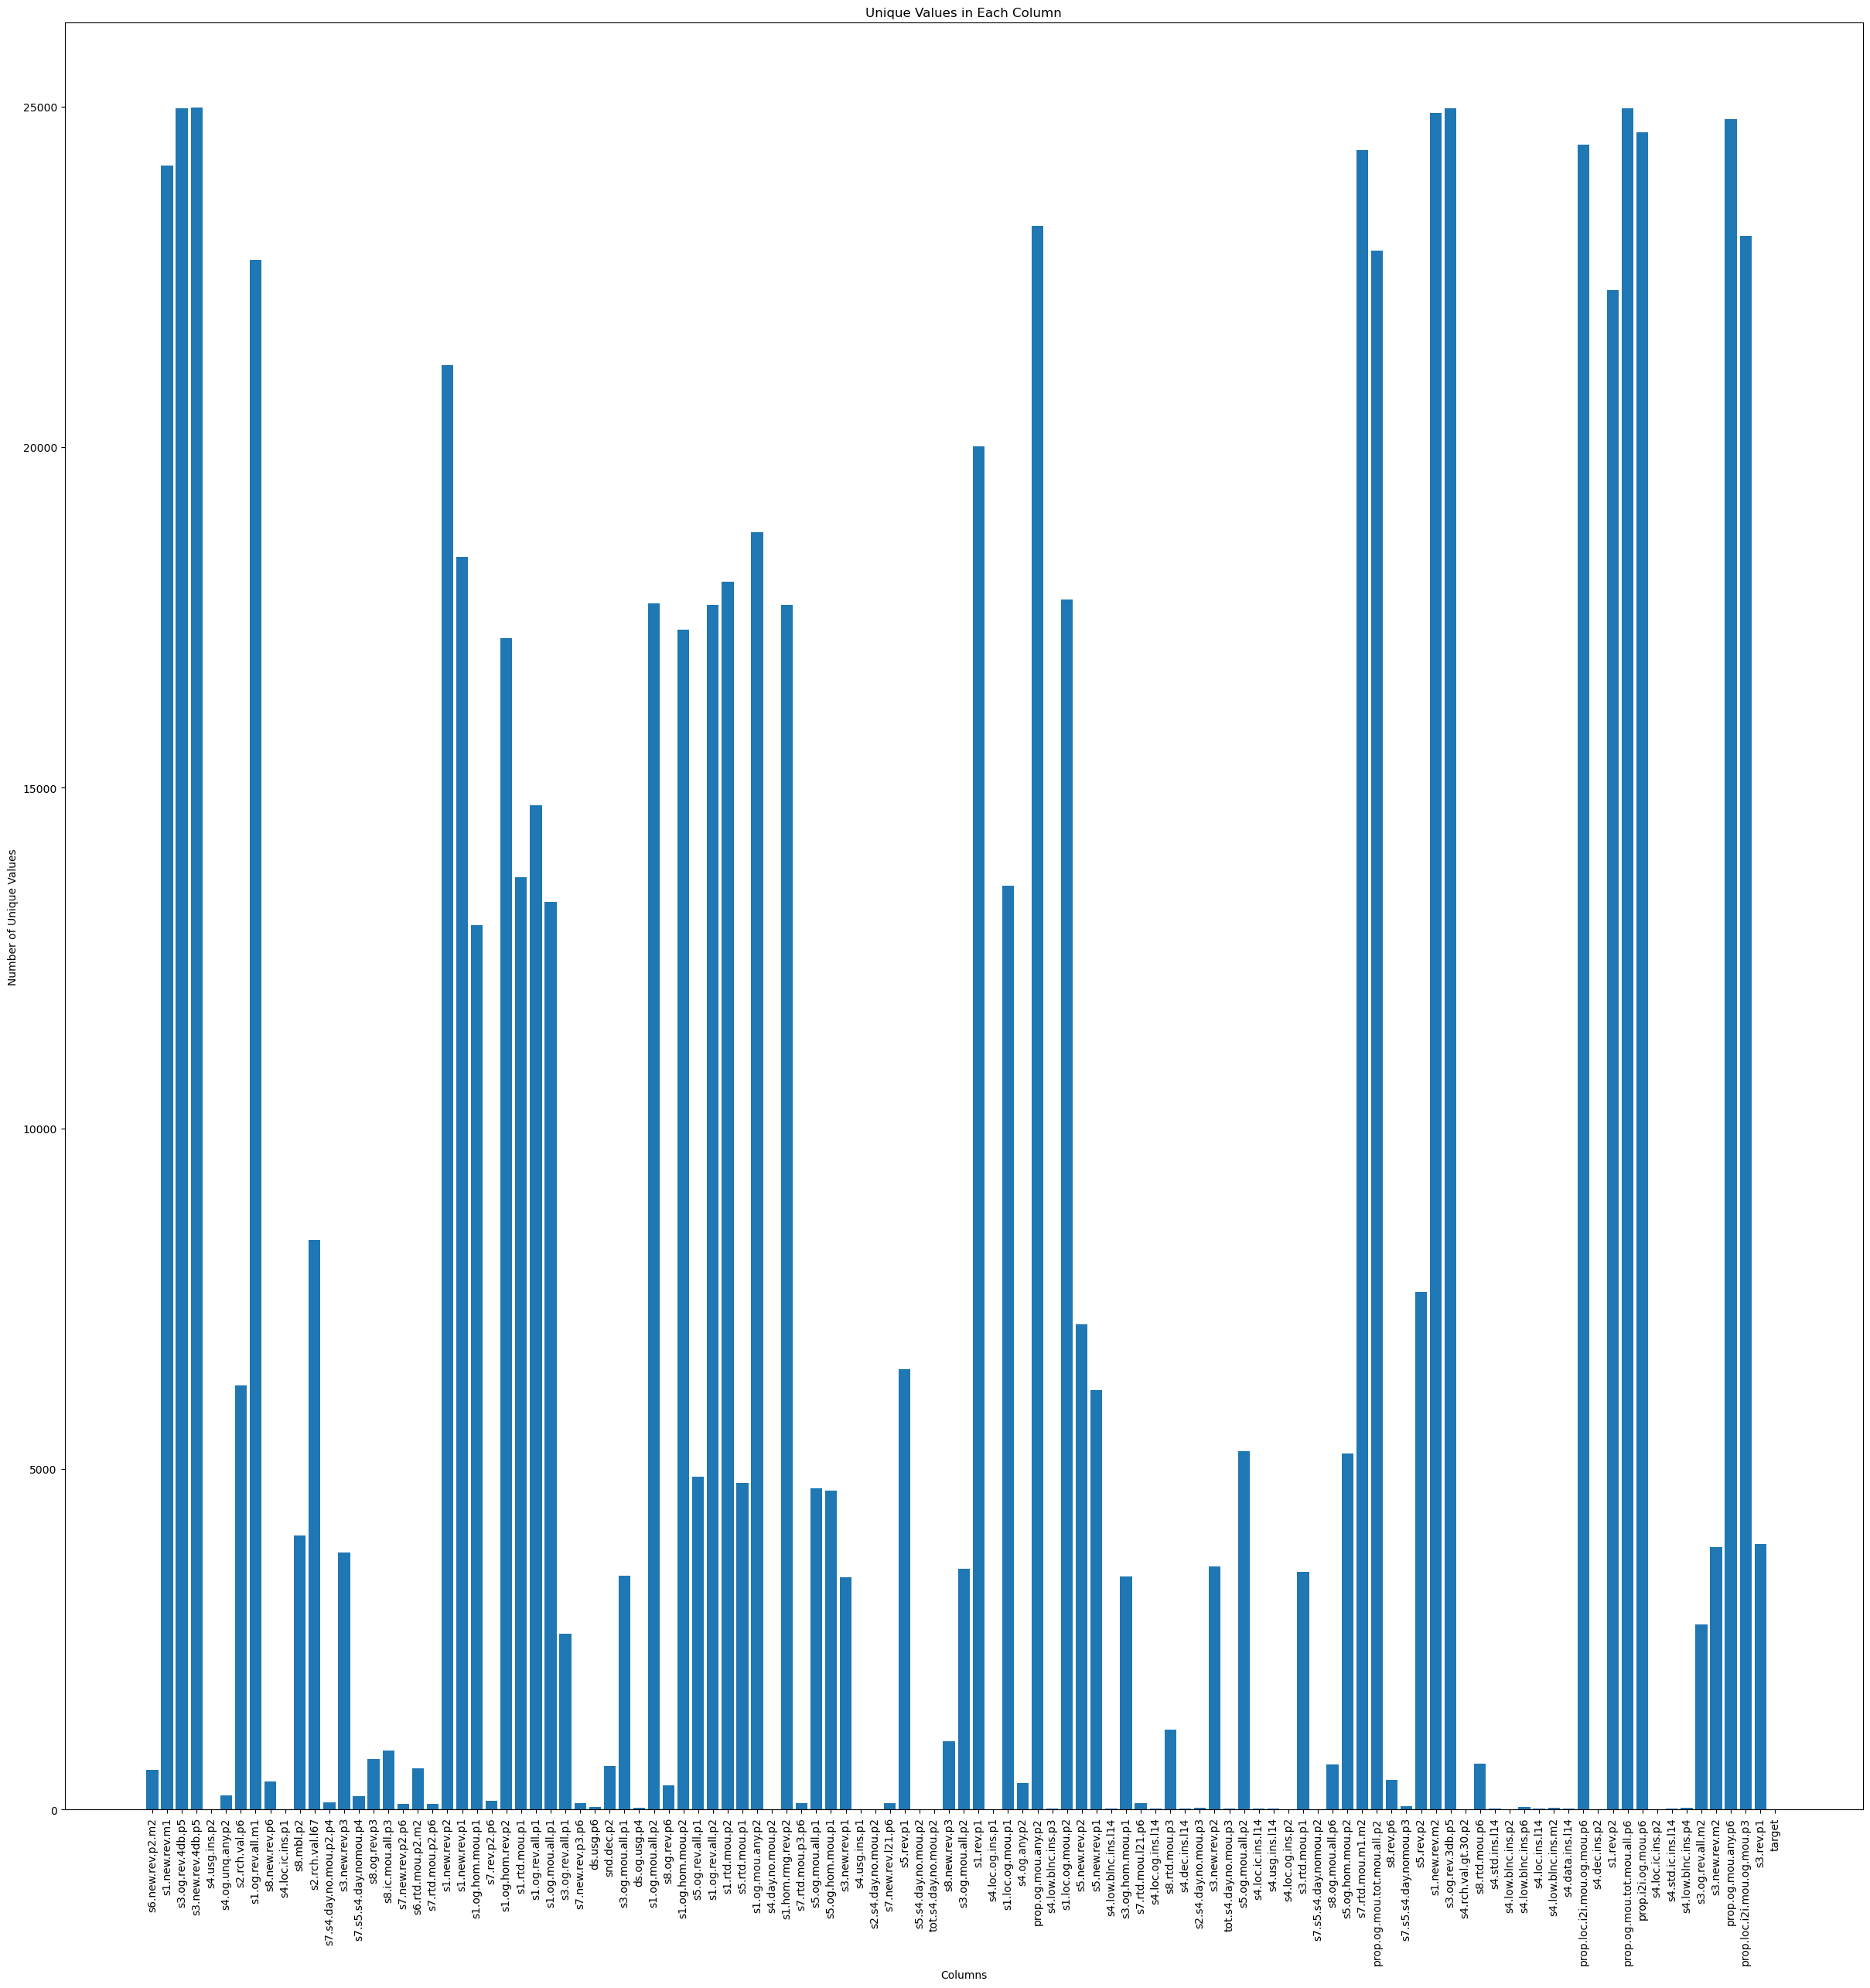

In [19]:
plt.figure(figsize=(30,30))
plt.bar(value_counts.index, value_counts.values)
plt.xlabel('Columns')
plt.ylabel('Number of Unique Values')
plt.title('Unique Values in Each Column')
plt.xticks(rotation=90)
plt.show()

In [20]:
unique_columns = value_counts[value_counts == 1].index
print(unique_columns)

Index([], dtype='object')


In [21]:
data_filtered = data.drop(columns=unique_columns)
print(data_filtered)

       s6.new.rev.p2.m2  s1.new.rev.m1  s3.og.rev.4db.p5  s3.new.rev.4db.p5  \
0                 -0.76        88.0482          3.106604           3.754955   
1                 -0.98        67.5039          3.094574           5.550865   
2                 -0.98        33.9248          2.324016           2.438114   
3                 -0.92        82.6780          2.630749           2.858961   
4                 -0.97        96.8379          2.674316           2.912397   
...                 ...            ...               ...                ...   
24995              0.21       132.0365          2.652236           2.857739   
24996              0.80        77.0154          3.763389           5.012503   
24997              0.01       148.8337          3.823940           4.334250   
24998              0.17      1012.4398         14.667580          14.579567   
24999             -1.00       275.3530          5.134579           5.954062   

       s4.usg.ins.p2  s4.og.unq.any.p2  s2.rch.val.

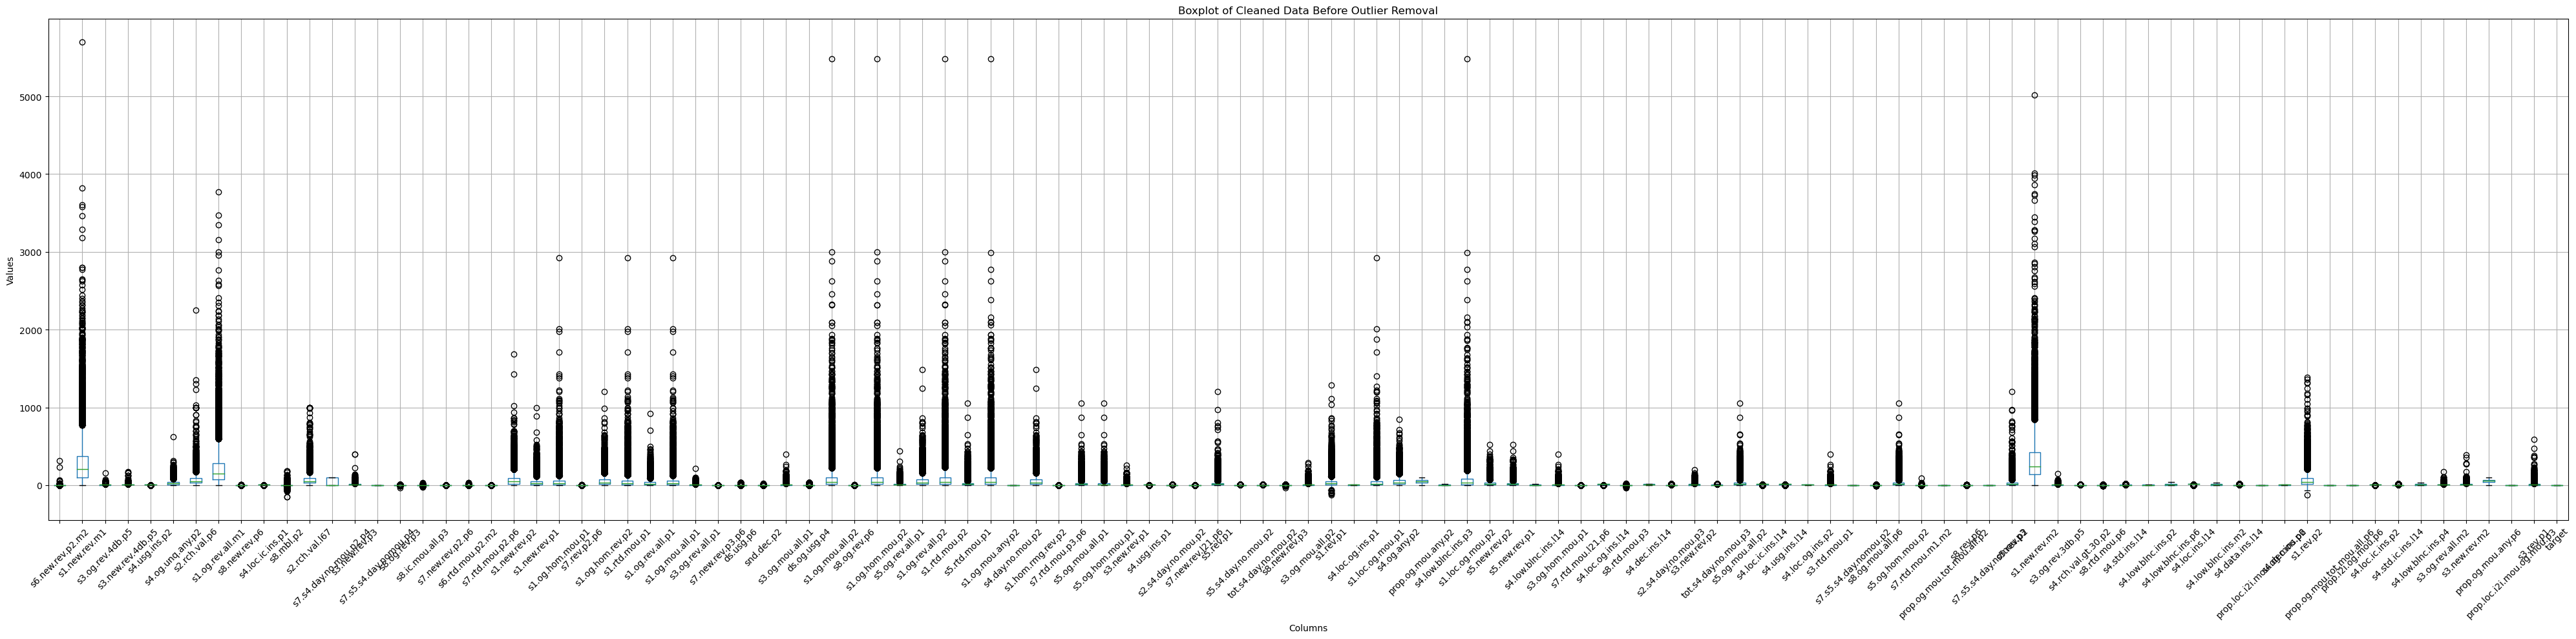

In [22]:
def boxplot_before(df):
    df.boxplot(figsize=(40, 10))
    plt.title('Boxplot of Cleaned Data Before Outlier Removal')
    plt.xticks(rotation=45)
    plt.xlabel('Columns')
    plt.ylabel('Values')
    plt.tight_layout()
    plt.show()


boxplot_before(data_filtered)

### Removing Zero variance variables

In [24]:
#var_data = data_filtered.var()
#zero_var = var_data[var_data.apply(lambda x: str(x).startswith('0'))].index
#data_filtered.drop(columns=zero_var,inplace=True)


target_column = 'target'
var_data = data_filtered.drop(columns=[target_column]).var()
zero_var = var_data[var_data.apply(lambda x: str(x).startswith('0'))].index
data_filtered.drop(columns=zero_var, inplace=True)

if target_column not in data_filtered.columns:
    print("Warning: Target column '{}' was removed due to zero variance.".format(target_column))


In [25]:
data_filtered

,s6.new.rev.p2.m2,s1.new.rev.m1,s3.og.rev.4db.p5,s3.new.rev.4db.p5,s4.usg.ins.p2,s4.og.unq.any.p2,s2.rch.val.p6,s1.og.rev.all.m1,s4.loc.ic.ins.p1,s8.mbl.p2,...,s4.dec.ins.p2,s1.rev.p2,s4.loc.ic.ins.p2,s4.std.ic.ins.l14,s4.low.blnc.ins.p4,s3.og.rev.all.m2,s3.new.rev.m2,prop.og.mou.any.p6,s3.rev.p1,target
0,-0.76,88.0482,3.106604,3.754955,4,14,39.29,57.320,1,-0.72,...,4,6.3180,4,0,9,6.02,8.20,46.465636,0.22,1
1,-0.98,67.5039,3.094574,5.550865,1,2,21.67,38.700,3,-0.08,...,1,0.7562,6,0,20,3.66,8.10,34.525456,0.38,1
2,-0.98,33.9248,2.324016,2.438114,2,3,30.00,15.320,3,-0.09,...,2,0.5174,6,1,19,4.33,4.36,10.298451,0.11,1
3,-0.92,82.6780,2.630749,2.858961,2,3,50.00,51.956,4,1.83,...,2,-8.7264,7,2,11,3.40,3.53,6.670783,5.18,0
4,-0.97,96.8379,2.674316,2.912397,3,2,22.50,66.886,4,-0.04,...,3,1.6745,6,1,14,3.85,3.87,21.998905,0.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,0.21,132.0365,2.652236,2.857739,5,8,26.67,123.396,4,0.76,...,5,20.6999,7,0,18,3.57,3.83,14.896154,0.76,1
24996,0.80,77.0154,3.763389,5.012503,2,8,27.88,62.140,4,0.37,...,2,42.8656,7,0,18,6.89,7.70,55.156230,12.74,0
24997,0.01,148.8337,3.823940,4.334250,6,10,10.00,98.900,2,-0.79,...,5,20.8590,3,0,12,6.63,7.48,33.222018,8.07,0
24998,0.17,1012.4398,14.667580,14.579567,7,67,42.92,734.005,4,-1.09,...,4,489.7368,7,1,1,19.36,22.26,82.549378,21.21,0


### Outlier treatment

#### 1) Using Boxplot

In [26]:
columns_for_outlier_treatment = data_filtered.columns
print(columns_for_outlier_treatment)

Index(['s6.new.rev.p2.m2', 's1.new.rev.m1', 's3.og.rev.4db.p5',
       's3.new.rev.4db.p5', 's4.usg.ins.p2', 's4.og.unq.any.p2',
       's2.rch.val.p6', 's1.og.rev.all.m1', 's4.loc.ic.ins.p1', 's8.mbl.p2',
       's2.rch.val.l67', 's7.s4.day.no.mou.p2.p4', 's3.new.rev.p3',
       's8.ic.mou.all.p3', 's1.new.rev.p2', 's1.new.rev.p1',
       's1.og.hom.mou.p1', 's1.og.hom.rev.p2', 's1.rtd.mou.p1',
       's1.og.rev.all.p1', 's1.og.mou.all.p1', 's3.og.rev.all.p1', 'ds.usg.p6',
       'snd.dec.p2', 's3.og.mou.all.p1', 'ds.og.usg.p4', 's1.og.mou.all.p2',
       's1.og.hom.mou.p2', 's5.og.rev.all.p1', 's1.og.rev.all.p2',
       's1.rtd.mou.p2', 's5.rtd.mou.p1', 's1.og.mou.any.p2',
       's1.hom.rmg.rev.p2', 's5.og.mou.all.p1', 's5.og.hom.mou.p1',
       's3.new.rev.p1', 's4.usg.ins.p1', 's2.s4.day.no.mou.p2', 's5.rev.p1',
       's5.s4.day.no.mou.p2', 'tot.s4.day.no.mou.p2', 's8.new.rev.p3',
       's3.og.mou.all.p2', 's1.rev.p1', 's4.loc.og.ins.p1', 's1.loc.og.mou.p1',
       's4.og.any.p2

In [27]:
print(len(columns_for_outlier_treatment))

87


In [28]:
def remove_outliers_boxplot(df, columns):
    df_cleaned = df.copy()
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        #print(Q1,Q3)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        #print(lower_bound,upper_bound)
        df_cleaned[column] = df_cleaned[column].clip(lower=lower_bound, upper=upper_bound)
    return df_cleaned
cleaned_data_boxplot = remove_outliers_boxplot(data_filtered,columns_for_outlier_treatment)

In [29]:
data_filtered.describe()

,s6.new.rev.p2.m2,s1.new.rev.m1,s3.og.rev.4db.p5,s3.new.rev.4db.p5,s4.usg.ins.p2,s4.og.unq.any.p2,s2.rch.val.p6,s1.og.rev.all.m1,s4.loc.ic.ins.p1,s8.mbl.p2,...,s4.dec.ins.p2,s1.rev.p2,s4.loc.ic.ins.p2,s4.std.ic.ins.l14,s4.low.blnc.ins.p4,s3.og.rev.all.m2,s3.new.rev.m2,prop.og.mou.any.p6,s3.rev.p1,target
count,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,...,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000
mean,-0.003730,281.073083,4.890003,7.070194,5.460080,28.532520,72.208906,218.517937,3.254720,-0.073908,...,4.394760,71.815476,5.731280,1.797320,8.382160,8.008660,12.540182,53.594165,9.951366,0.316680
std,2.727916,276.075983,4.212452,6.318992,2.184444,28.061435,67.921490,231.321064,1.193271,8.829159,...,2.686308,88.621086,1.936848,3.048943,8.961016,6.152429,11.540611,21.408486,17.648128,0.465191
min,-1.000000,0.000000,0.000000,0.000833,0.000000,0.000000,0.000000,0.000000,0.000000,-153.750000,...,0.000000,-128.446200,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-0.580000,101.563800,2.367288,3.318825,5.000000,9.000000,33.000000,74.420000,3.000000,-2.560000,...,2.000000,18.157925,5.000000,0.000000,1.000000,4.207500,6.167500,39.378142,1.970000,0.000000
50%,-0.170000,204.859600,3.729944,5.231268,7.000000,21.000000,52.260000,151.168500,4.000000,-0.080000,...,5.000000,44.313650,7.000000,0.000000,5.000000,6.345000,9.350000,53.976203,5.380000,0.000000
75%,0.280000,370.711650,5.993342,8.395736,7.000000,39.000000,89.852500,284.265000,4.000000,1.040000,...,7.000000,93.423525,7.000000,2.000000,14.000000,9.830000,14.620000,68.312416,11.400000,1.000000
max,316.860000,5702.924300,153.221695,170.200441,7.000000,622.000000,2249.000000,3767.565000,4.000000,183.350000,...,7.000000,1382.751700,7.000000,14.000000,30.000000,171.780000,386.480000,100.000000,585.500000,1.000000


In [30]:
cleaned_data_boxplot.describe()

,s6.new.rev.p2.m2,s1.new.rev.m1,s3.og.rev.4db.p5,s3.new.rev.4db.p5,s4.usg.ins.p2,s4.og.unq.any.p2,s2.rch.val.p6,s1.og.rev.all.m1,s4.loc.ic.ins.p1,s8.mbl.p2,...,s4.dec.ins.p2,s1.rev.p2,s4.loc.ic.ins.p2,s4.std.ic.ins.l14,s4.low.blnc.ins.p4,s3.og.rev.all.m2,s3.new.rev.m2,prop.og.mou.any.p6,s3.rev.p1,target
count,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,...,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000
mean,-0.083814,263.414113,4.559075,6.492778,5.624880,27.137520,67.150729,201.146059,3.374020,-0.547296,...,4.394760,64.075974,5.835480,1.322600,8.382160,7.578758,11.333164,53.594165,7.817712,0.316680
std,0.668743,211.173061,2.897105,4.219776,1.818213,23.163585,46.538585,167.480617,0.915725,3.921211,...,2.686308,60.515962,1.667562,1.822707,8.961016,4.477694,6.941543,21.408486,7.555598,0.465191
min,-1.000000,0.000000,0.000000,0.000833,2.000000,0.000000,0.000000,0.000000,1.500000,-7.960000,...,0.000000,-94.740475,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-0.580000,101.563800,2.367288,3.318825,5.000000,9.000000,33.000000,74.420000,3.000000,-2.560000,...,2.000000,18.157925,5.000000,0.000000,1.000000,4.207500,6.167500,39.378142,1.970000,0.000000
50%,-0.170000,204.859600,3.729944,5.231268,7.000000,21.000000,52.260000,151.168500,4.000000,-0.080000,...,5.000000,44.313650,7.000000,0.000000,5.000000,6.345000,9.350000,53.976203,5.380000,0.000000
75%,0.280000,370.711650,5.993342,8.395736,7.000000,39.000000,89.852500,284.265000,4.000000,1.040000,...,7.000000,93.423525,7.000000,2.000000,14.000000,9.830000,14.620000,68.312416,11.400000,1.000000
max,1.570000,774.433425,11.432423,16.011101,7.000000,84.000000,175.131250,599.032500,4.000000,6.440000,...,7.000000,206.321925,7.000000,5.000000,30.000000,18.263750,27.298750,100.000000,25.545000,1.000000


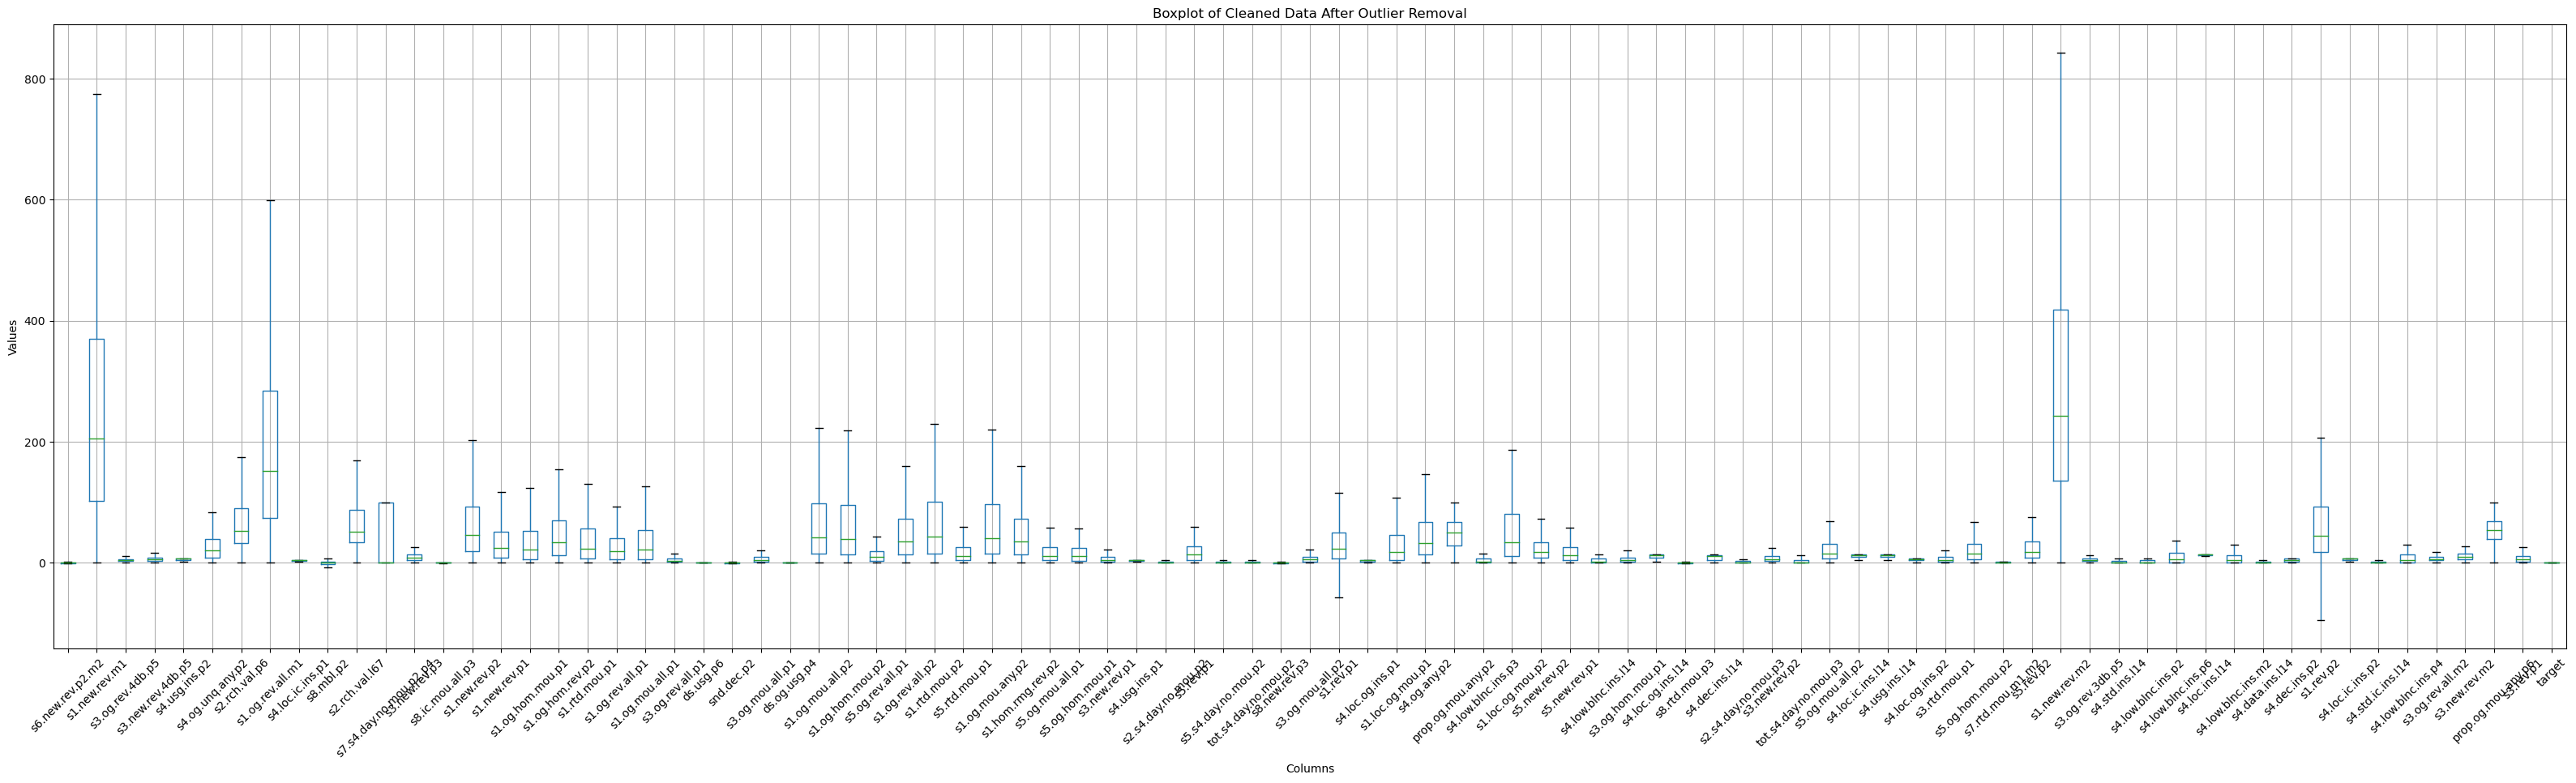

In [31]:
def boxplot_vis(df):
    
    df.boxplot(figsize=(40, 10))
    plt.title('Boxplot of Cleaned Data After Outlier Removal')
    plt.xticks(rotation=45)
    plt.xlabel('Columns')
    plt.ylabel('Values')
    plt.show()


boxplot_vis(cleaned_data_boxplot)

#### 2) Using Standardization

In [32]:
def remove_outliers_standardization(df, columns):
    df_cleaned = df.copy()
    for column in columns:
        mean = df[column].mean()
        std_dev = df[column].std()
        upper_bound = mean + 3 * std_dev
        lower_bound = mean - 3 * std_dev
        df_cleaned[column] = df_cleaned[column].clip(lower=lower_bound, upper=upper_bound)
    return df_cleaned

cleaned_df_standardization = remove_outliers_standardization(data_filtered,columns_for_outlier_treatment)

In [34]:
cleaned_df_standardization.describe()

,s6.new.rev.p2.m2,s1.new.rev.m1,s3.og.rev.4db.p5,s3.new.rev.4db.p5,s4.usg.ins.p2,s4.og.unq.any.p2,s2.rch.val.p6,s1.og.rev.all.m1,s4.loc.ic.ins.p1,s8.mbl.p2,...,s4.dec.ins.p2,s1.rev.p2,s4.loc.ic.ins.p2,s4.std.ic.ins.l14,s4.low.blnc.ins.p4,s3.og.rev.all.m2,s3.new.rev.m2,prop.og.mou.any.p6,s3.rev.p1,target
count,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,...,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000
mean,-0.035134,274.265303,4.768191,6.926177,5.460080,27.993564,70.389389,212.115913,3.254720,-0.221430,...,4.394760,69.263424,5.731280,1.745750,8.382160,7.844315,12.214477,53.594165,9.129953,0.316680
std,0.865882,241.948728,3.498623,5.408293,2.184444,25.566688,55.618108,198.651777,1.193271,7.080653,...,2.686308,75.199246,1.936848,2.868339,8.961016,5.234381,9.465783,21.408486,11.839886,0.465191
min,-1.000000,0.000000,0.000000,0.000833,0.000000,0.000000,0.000000,0.000000,0.000000,-26.561383,...,0.000000,-128.446200,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-0.580000,101.563800,2.367288,3.318825,5.000000,9.000000,33.000000,74.420000,3.000000,-2.560000,...,2.000000,18.157925,5.000000,0.000000,1.000000,4.207500,6.167500,39.378142,1.970000,0.000000
50%,-0.170000,204.859600,3.729944,5.231268,7.000000,21.000000,52.260000,151.168500,4.000000,-0.080000,...,5.000000,44.313650,7.000000,0.000000,5.000000,6.345000,9.350000,53.976203,5.380000,0.000000
75%,0.280000,370.711650,5.993342,8.395736,7.000000,39.000000,89.852500,284.265000,4.000000,1.040000,...,7.000000,93.423525,7.000000,2.000000,14.000000,9.830000,14.620000,68.312416,11.400000,1.000000
max,8.180017,1109.301033,17.527360,26.027170,7.000000,112.716824,275.973374,912.481128,4.000000,26.413568,...,7.000000,337.678733,7.000000,10.944149,30.000000,26.465947,47.162016,100.000000,62.895750,1.000000


# Using Capping and Flooring

In [35]:
#def remove_outliers_capping_flooring(df, columns):
#    df_cleaned = df.copy()
#    for column in columns:
#        upper_bound = df[column].quantile(0.95)
#        lower_bound = df[column].quantile(0.05)
#       df_cleaned[column] = df_cleaned[column].clip(lower=lower_bound, upper=upper_bound)
#  return df_cleaned

#cleaned_df_capping_flooring = remove_outliers_capping_flooring(data_filtered, columns_for_outlier_treatment)

def remove_outliers_capping_flooring(df, columns, threshold=0.90):
    df_cleaned = df.copy()
    for column in columns:
       
        upper_bound = df[column].quantile(threshold)
        lower_bound = df[column].quantile(1 - threshold)
        
        df_cleaned[column] = df_cleaned[column].clip(lower=lower_bound, upper=upper_bound)
    return df_cleaned


threshold_value = 0.90
cleaned_df_capping_flooring = remove_outliers_capping_flooring(data_filtered, columns_for_outlier_treatment, threshold=threshold_value)



In [37]:
cleaned_df_capping_flooring.describe()

,s6.new.rev.p2.m2,s1.new.rev.m1,s3.og.rev.4db.p5,s3.new.rev.4db.p5,s4.usg.ins.p2,s4.og.unq.any.p2,s2.rch.val.p6,s1.og.rev.all.m1,s4.loc.ic.ins.p1,s8.mbl.p2,...,s4.dec.ins.p2,s1.rev.p2,s4.loc.ic.ins.p2,s4.std.ic.ins.l14,s4.low.blnc.ins.p4,s3.og.rev.all.m2,s3.new.rev.m2,prop.og.mou.any.p6,s3.rev.p1,target
count,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,...,25000.000000,25000.000000,25000.000000,25000.00000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000
mean,-0.125018,253.666333,4.438104,6.409191,5.624880,25.850400,65.786185,193.686050,3.316560,-0.445291,...,4.394760,61.127736,5.931920,1.43784,7.910120,7.390437,11.110366,53.828040,7.437138,0.316680
std,0.568071,180.977250,2.489779,3.852599,1.818213,19.913707,41.329848,145.105501,1.038919,3.791822,...,2.686308,53.380789,1.458798,2.06684,7.967817,3.818517,6.110995,18.126079,6.719268,0.465191
min,-0.950000,44.141090,1.631299,2.247705,2.000000,2.000000,21.250000,28.440000,1.000000,-7.000000,...,0.000000,1.373610,3.000000,0.00000,0.000000,2.980000,4.260000,25.210790,0.020000,0.000000
25%,-0.580000,101.563800,2.367288,3.318825,5.000000,9.000000,33.000000,74.420000,3.000000,-2.560000,...,2.000000,18.157925,5.000000,0.00000,1.000000,4.207500,6.167500,39.378142,1.970000,0.000000
50%,-0.170000,204.859600,3.729944,5.231268,7.000000,21.000000,52.260000,151.168500,4.000000,-0.080000,...,5.000000,44.313650,7.000000,0.00000,5.000000,6.345000,9.350000,53.976203,5.380000,0.000000
75%,0.280000,370.711650,5.993342,8.395736,7.000000,39.000000,89.852500,284.265000,4.000000,1.040000,...,7.000000,93.423525,7.000000,2.00000,14.000000,9.830000,14.620000,68.312416,11.400000,1.000000
max,0.870000,604.256880,9.361996,14.433326,7.000000,64.000000,150.000000,479.603100,4.000000,6.590000,...,7.000000,167.986420,7.000000,6.00000,23.000000,14.831000,23.550000,82.206440,21.061000,1.000000


# Removing highly correlated value

In [38]:
#correlation_matrix = cleaned_data_boxplot.corr().abs()
#upper_tri = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))
#to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.95)]  
#cleaned_data_boxplot = cleaned_data_boxplot.drop(to_drop, axis=1)

def remove_highly_correlated_variables(df, threshold=0.90):
    correlation_matrix = cleaned_df_capping_flooring.corr().abs()
    upper_tri = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))
    to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > threshold)]  
    cleaned_data = cleaned_df_capping_flooring.drop(to_drop, axis=1)
    return cleaned_data

threshold_value=0.90
cleaned_data_no_correlation = remove_highly_correlated_variables(cleaned_df_capping_flooring, threshold=threshold_value)

In [39]:
#print(cleaned_data_boxplot.shape)
print(cleaned_data_no_correlation.shape)

(25000, 40)


In [40]:
#cleaned_data_boxplot
cleaned_data_no_correlation

,s6.new.rev.p2.m2,s1.new.rev.m1,s3.og.rev.4db.p5,s3.new.rev.4db.p5,s4.usg.ins.p2,s4.og.unq.any.p2,s2.rch.val.p6,s4.loc.ic.ins.p1,s8.mbl.p2,s7.s4.day.no.mou.p2.p4,...,s4.loc.ic.ins.l14,s7.rtd.mou.m1.m2,s5.rev.p2,s1.new.rev.m2,s4.std.ins.l14,s4.low.blnc.ins.p6,s4.loc.ins.l14,s4.data.ins.l14,prop.og.mou.any.p6,target
0,-0.76,88.04820,3.106604,3.754955,4,14,39.29,1,-0.72,1.000000,...,9,0.240533,7.040,295.18890,0,9,12,0,46.465636,1
1,-0.95,67.50390,3.094574,5.550865,2,2,21.67,3,-0.08,0.500000,...,13,0.459725,1.770,158.65470,0,23,13,0,34.525456,1
2,-0.95,44.14109,2.324016,2.438114,2,3,30.00,3,-0.09,0.384615,...,13,0.218333,1.770,99.56430,1,19,14,0,25.210790,1
3,-0.92,82.67800,2.630749,2.858961,2,3,50.00,4,1.83,0.416667,...,14,1.624633,1.770,90.17214,2,11,14,0,25.210790,0
4,-0.95,96.83790,2.674316,2.912397,3,2,22.50,4,-0.04,0.222222,...,13,1.624633,1.770,90.17214,1,20,14,2,25.210790,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,0.21,132.03650,2.652236,2.857739,5,8,26.67,4,0.76,0.250000,...,12,1.423358,14.920,90.17214,0,21,12,0,25.210790,1
24996,0.80,77.01540,3.763389,5.012503,2,8,27.88,4,0.37,0.454545,...,13,0.688912,25.170,117.62060,0,23,13,0,55.156230,0
24997,0.01,148.83370,3.823940,4.334250,6,10,21.25,2,-0.79,0.083333,...,6,1.223699,17.000,91.01390,1,18,9,1,33.222018,0
24998,0.17,604.25688,9.361996,14.433326,7,64,42.92,4,-1.09,99.000000,...,14,0.579099,65.921,655.20803,1,1,14,3,82.206440,0


# Multicollinearity (VIF > 5)

In [41]:
def calculate_vif(data):
    vif_data = pd.DataFrame()
    vif_data["Feature"] = data.columns
    vif_data["VIF"] = [variance_inflation_factor(data.values, i) for i in range(data.shape[1])]
    return vif_data

vif_result = calculate_vif(cleaned_df_capping_flooring.dropna()) 
high_vif_cols = vif_result[vif_result['VIF'] > 10]['Feature']
cleaned_df_capping_flooring_f = cleaned_df_capping_flooring.drop(high_vif_cols, axis=1)


print(cleaned_df_capping_flooring_f.columns)

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


Index(['s6.new.rev.p2.m2', 's4.loc.ic.ins.p1', 's8.mbl.p2', 's2.rch.val.l67',
       's7.s4.day.no.mou.p2.p4', 's3.new.rev.p3', 's8.ic.mou.all.p3',
       's8.new.rev.p3', 'prop.og.mou.any.p2', 's8.rtd.mou.p3',
       's2.s4.day.no.mou.p3', 's7.rtd.mou.m1.m2', 's4.std.ins.l14',
       's4.loc.ins.l14', 's4.data.ins.l14', 's4.std.ic.ins.l14',
       'prop.og.mou.any.p6', 'target'],
      dtype='object')


In [42]:
cleaned_df_capping_flooring_f.describe()

,s6.new.rev.p2.m2,s4.loc.ic.ins.p1,s8.mbl.p2,s2.rch.val.l67,s7.s4.day.no.mou.p2.p4,s3.new.rev.p3,s8.ic.mou.all.p3,s8.new.rev.p3,prop.og.mou.any.p2,s8.rtd.mou.p3,s2.s4.day.no.mou.p3,s7.rtd.mou.m1.m2,s4.std.ins.l14,s4.loc.ins.l14,s4.data.ins.l14,s4.std.ic.ins.l14,prop.og.mou.any.p6,target
count,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.00000,25000.000000,25000.000000
mean,-0.125018,3.316560,-0.445291,65.257001,28.481545,9.383105,-0.040155,-0.080875,47.487627,-0.095525,1.343184,0.878399,2.286320,12.943880,2.187760,1.43784,53.828040,0.316680
std,0.568071,1.038919,3.791822,40.161540,44.601940,6.049282,0.386062,0.563203,25.085681,0.530688,1.943686,0.430306,3.092391,1.718269,4.009612,2.06684,18.126079,0.465191
min,-0.950000,1.000000,-7.000000,22.299000,0.000000,2.229000,-0.720000,-1.060000,5.044912,-1.070000,0.000000,0.218333,0.000000,9.000000,0.000000,0.00000,25.210790,0.000000
25%,-0.580000,3.000000,-2.560000,33.500000,0.100000,4.430000,-0.290000,-0.440000,28.366905,-0.400000,0.000000,0.552297,0.000000,13.000000,0.000000,0.00000,39.378142,0.000000
50%,-0.170000,4.000000,-0.080000,51.670000,0.363636,7.820000,-0.020000,-0.040000,50.032461,-0.050000,0.000000,0.860550,1.000000,14.000000,0.000000,0.00000,53.976203,0.000000
75%,0.280000,4.000000,1.040000,87.585000,99.000000,13.060000,0.210000,0.280000,67.825861,0.230000,2.500000,1.176028,3.000000,14.000000,2.000000,2.00000,68.312416,1.000000
max,0.870000,4.000000,6.590000,147.500000,99.000000,21.320000,0.590000,0.850000,83.584801,0.760000,5.500000,1.624633,9.000000,14.000000,12.000000,6.00000,82.206440,1.000000


In [43]:
cleaned_df_capping_flooring_f.shape

(25000, 18)

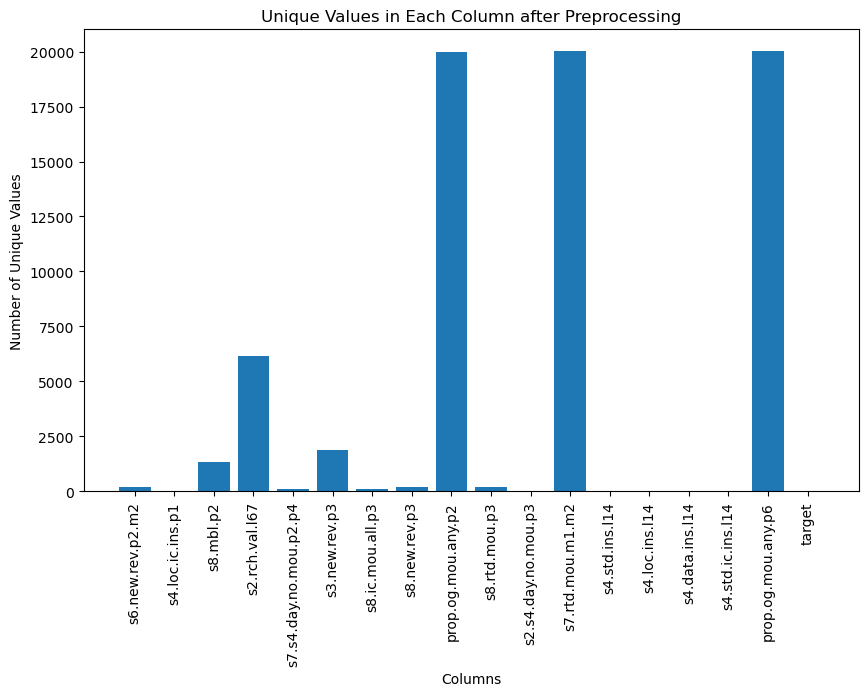

In [44]:
value_counts_cleaned = cleaned_df_capping_flooring_f.nunique()
plt.figure(figsize=(10,6))
plt.bar(value_counts_cleaned.index, value_counts_cleaned.values)
plt.xlabel('Columns')
plt.ylabel('Number of Unique Values')
plt.title('Unique Values in Each Column after Preprocessing')
plt.xticks(rotation=90)
plt.show()

In [45]:
cleaned_df_capping_flooring_f1 = cleaned_df_capping_flooring_f.drop(['prop.og.mou.any.p2', 's7.rtd.mou.m1.m2', 'prop.og.mou.any.p6'], axis=1)

In [46]:
cleaned_df_capping_flooring_f1

,s6.new.rev.p2.m2,s4.loc.ic.ins.p1,s8.mbl.p2,s2.rch.val.l67,s7.s4.day.no.mou.p2.p4,s3.new.rev.p3,s8.ic.mou.all.p3,s8.new.rev.p3,s8.rtd.mou.p3,s2.s4.day.no.mou.p3,s4.std.ins.l14,s4.loc.ins.l14,s4.data.ins.l14,s4.std.ic.ins.l14,target
0,-0.76,1,-0.72,39.440,1.000000,7.160,-0.72,-0.90,-0.50,2.00,0,12,0,0,1
1,-0.95,3,-0.08,22.299,0.500000,2.229,0.00,-0.14,-0.11,5.00,0,13,0,0,1
2,-0.95,3,-0.09,29.500,0.384615,4.190,-0.72,-0.45,-0.39,2.00,1,14,0,1,1
3,-0.92,4,1.83,46.670,0.416667,2.229,-0.43,-0.02,-0.02,2.25,2,14,0,2,0
4,-0.95,4,-0.04,37.200,0.222222,5.120,-0.72,-0.67,-0.63,3.00,1,14,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,0.21,4,0.76,39.170,0.250000,3.910,0.59,0.26,-0.13,2.50,0,12,0,0,1
24996,0.80,4,0.37,25.210,0.454545,8.770,0.04,0.82,0.22,5.00,0,13,0,0,0
24997,0.01,2,-0.79,22.299,0.083333,4.480,0.27,0.38,0.25,2.50,1,9,1,0,0
24998,0.17,4,-1.09,40.020,99.000000,21.320,-0.42,-1.06,-1.07,0.00,1,14,3,1,0


In [47]:
numerical_columns = cleaned_df_capping_flooring_f1.select_dtypes(include=['float64', 'int64'])

vif_data = pd.DataFrame()
vif_data["Variable"] = numerical_columns.columns

vif_data["VIF"] = [variance_inflation_factor(numerical_columns.values, i) for i in range(len(numerical_columns.columns))]
print(vif_data)

                  Variable        VIF
0         s6.new.rev.p2.m2   2.604336
1         s4.loc.ic.ins.p1  24.448580
2                s8.mbl.p2   1.037151
3           s2.rch.val.l67   4.520154
4   s7.s4.day.no.mou.p2.p4   1.947206
5            s3.new.rev.p3   5.020884
6         s8.ic.mou.all.p3   1.119909
7            s8.new.rev.p3   2.681624
8            s8.rtd.mou.p3   2.095096
9      s2.s4.day.no.mou.p3   2.131691
10          s4.std.ins.l14   9.932201
11          s4.loc.ins.l14  32.157225
12         s4.data.ins.l14   1.416339
13       s4.std.ic.ins.l14   9.305244
14                  target   2.082644


In [48]:
vif_data.describe()

,VIF
count,15.000000
mean,6.833352
std,9.249127
min,1.037151
25%,2.014925
50%,2.604336
75%,7.163064
max,32.157225


# Model training

In [49]:
X = cleaned_df_capping_flooring_f1.drop(columns=['target'], axis=1)  
y = cleaned_df_capping_flooring_f1['target']

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [51]:
train_data = pd.concat([X_train, y_train], axis=1)
train_data.to_csv('training_data.csv', index=False)

In [52]:
test_data = pd.concat([X_test, y_test], axis=1)
test_data.to_csv('testing_data.csv', index=False)

In [53]:
train_data = pd.read_csv('training_data.csv')
test_data = pd.read_csv('testing_data.csv')

In [54]:
print("Training Data:")
train_data.head()

Training Data:


,s6.new.rev.p2.m2,s4.loc.ic.ins.p1,s8.mbl.p2,s2.rch.val.l67,s7.s4.day.no.mou.p2.p4,s3.new.rev.p3,s8.ic.mou.all.p3,s8.new.rev.p3,s8.rtd.mou.p3,s2.s4.day.no.mou.p3,s4.std.ins.l14,s4.loc.ins.l14,s4.data.ins.l14,s4.std.ic.ins.l14,target
0,0.87,4,0.00,147.500,0.333333,21.32,-0.07,0.85,0.67,2.0,1,13,10,0,0
1,0.45,4,6.59,70.000,0.000000,9.43,0.42,0.70,0.61,0.0,0,14,0,0,0
2,0.07,4,0.43,22.299,0.000000,5.38,0.38,0.17,0.10,2.0,2,13,6,2,0
3,-0.95,3,-1.48,23.000,0.315789,3.94,-0.42,-0.29,0.00,4.0,0,14,8,0,0
4,0.87,2,-7.00,128.780,0.000000,12.37,0.19,0.85,0.76,4.0,7,12,12,6,0


In [55]:
train_data['target'].value_counts()

target
0    13646
1     6354
Name: count, dtype: int64

In [56]:
print("Testing Data:")
test_data.head()

Testing Data:


,s6.new.rev.p2.m2,s4.loc.ic.ins.p1,s8.mbl.p2,s2.rch.val.l67,s7.s4.day.no.mou.p2.p4,s3.new.rev.p3,s8.ic.mou.all.p3,s8.new.rev.p3,s8.rtd.mou.p3,s2.s4.day.no.mou.p3,s4.std.ins.l14,s4.loc.ins.l14,s4.data.ins.l14,s4.std.ic.ins.l14,target
0,0.87,4,0.06,30.89,0.000000,21.32,0.59,0.85,0.76,0.0,5,14,0,3,0
1,-0.12,1,-7.00,118.27,0.187500,21.32,0.03,0.38,0.35,4.5,5,9,0,4,0
2,-0.26,4,6.59,100.00,99.000000,12.67,0.16,-1.06,-1.01,0.0,0,14,0,0,0
3,0.15,4,-5.34,65.00,0.166667,4.53,-0.04,-0.43,-0.32,0.0,1,14,0,0,0
4,0.23,4,1.43,52.54,99.000000,7.85,-0.25,-0.26,-0.19,0.0,7,14,0,6,0


In [57]:
test_data['target'].value_counts()

target
0    3437
1    1563
Name: count, dtype: int64

In [58]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [59]:
#y_train_pred_rf = rf_model.predict(X_train)
train_pred = rf_model.predict(X_train)

In [60]:
#y_test_pred_rf = rf_model.predict(X_test)
test_pred = rf_model.predict(X_test)

In [61]:
train_accuracy = accuracy_score(y_train, train_pred)
test_accuracy = accuracy_score(y_test, test_pred)

In [62]:
print("Training Accuracy:", (train_accuracy * 100))
print("Testing Accuracy:", (test_accuracy * 100))

Training Accuracy: 99.98
Testing Accuracy: 78.96


In [63]:
print("Classification Report:")
print(classification_report(y_test, test_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.89      0.85      3437
           1       0.71      0.56      0.62      1563

    accuracy                           0.79      5000
   macro avg       0.76      0.73      0.74      5000
weighted avg       0.78      0.79      0.78      5000



In [64]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, test_pred))

Confusion Matrix:
[[3072  365]
 [ 687  876]]


# Hypertuning

In [65]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators' : [50, 100, 200],
    'max_depth' : [5, 10, 15, None],
    'min_samples_split' : [2, 5, 10],
    'min_samples_leaf' : [1, 2, 4]
}
grid_search = GridSearchCV(rf_model, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [5, 10, 15, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [66]:
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation accuracy: ", grid_search.best_score_)

Best parameters found:  {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 200}
Best cross-validation accuracy:  0.7894


In [67]:
best_model = grid_search.best_estimator_
best_params = best_model.get_params()
best_rf_model = RandomForestClassifier(**best_params)
best_rf_model.fit(X_train,y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=4, n_estimators=200,
                       random_state=42)

In [68]:
train_pred = best_rf_model.predict(X_train)

In [69]:
test_pred = best_rf_model.predict(X_test)

In [70]:
train_accuracy = accuracy_score(y_train, train_pred)
test_accuracy = accuracy_score(y_test, test_pred)

In [71]:
print("Training Accuracy:", (train_accuracy * 100))
print("Testing Accuracy:", (test_accuracy * 100))

Training Accuracy: 83.515
Testing Accuracy: 79.52


In [72]:
print("Classification Report:")
print(classification_report(y_test, test_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.90      0.86      3437
           1       0.72      0.56      0.63      1563

    accuracy                           0.80      5000
   macro avg       0.77      0.73      0.74      5000
weighted avg       0.79      0.80      0.79      5000



In [73]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, test_pred))

Confusion Matrix:
[[3100  337]
 [ 687  876]]
